In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pylab as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
session = Session(engine)

In [7]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [11]:
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [12]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [13]:
query1 = session.query(Measurement.date,Measurement.station,Measurement.prcp).\
filter(Measurement.date >= '2016-08-01').\
filter(Measurement.date <= '2017-08-01').\
order_by(Measurement.date).all()

In [14]:
query2 = session.query(Station.station,Station.name).all()

In [15]:
col1 = [date[0] for date in query1]
col2 = [station[1] for station in query1]
col3 = [prcp[2] for prcp in query1]
cola = [station[0] for station in query2]
colb = [name[1] for name in query2]

In [16]:
df = pd.DataFrame({
"Date": col1,
"Station": col2,
"Precipitation": col3,
})

In [17]:
df2 = df.dropna()
df2.head()

,Date,Station,Precipitation
0,2016-08-01,USC00519397,0.08
1,2016-08-01,USC00513117,2.35
3,2016-08-01,USC00519523,0.54
4,2016-08-01,USC00519281,3.53
5,2016-08-01,USC00516128,2.21


In [18]:
stations = pd.DataFrame({
"Station": cola,
"Name": colb
})

In [19]:
df3 = pd.merge(df2,stations, on = "Station")
df3 = df3[["Date", "Station", "Name", "Precipitation"]]
df3.head()

,Date,Station,Name,Precipitation
0,2016-08-01,USC00519397,"WAIKIKI 717.2, HI US",0.08
1,2016-08-02,USC00519397,"WAIKIKI 717.2, HI US",0.05
2,2016-08-03,USC00519397,"WAIKIKI 717.2, HI US",0.00
3,2016-08-04,USC00519397,"WAIKIKI 717.2, HI US",0.04
4,2016-08-05,USC00519397,"WAIKIKI 717.2, HI US",0.01


In [20]:
df3["Date"] = pd.to_datetime(df3["Date"])

In [21]:
df3.head()

,Date,Station,Name,Precipitation
0,2016-08-01,USC00519397,"WAIKIKI 717.2, HI US",0.08
1,2016-08-02,USC00519397,"WAIKIKI 717.2, HI US",0.05
2,2016-08-03,USC00519397,"WAIKIKI 717.2, HI US",0.00
3,2016-08-04,USC00519397,"WAIKIKI 717.2, HI US",0.04
4,2016-08-05,USC00519397,"WAIKIKI 717.2, HI US",0.01


In [22]:
s0 = df3.loc[df3["Station"] == "USC00513117"]
s1 = df3.loc[df3["Station"] == "USC00519281"]
s2 = df3.loc[df3["Station"] == "USC00519397"]
s3 = df3.loc[df3["Station"] == "USC00516128"]
s4 = df3.loc[df3["Station"] == "USC00519523"]
s5 = df3.loc[df3["Station"] == "USC00514830"]
s6 = df3.loc[df3["Station"] == "USC00517948"]

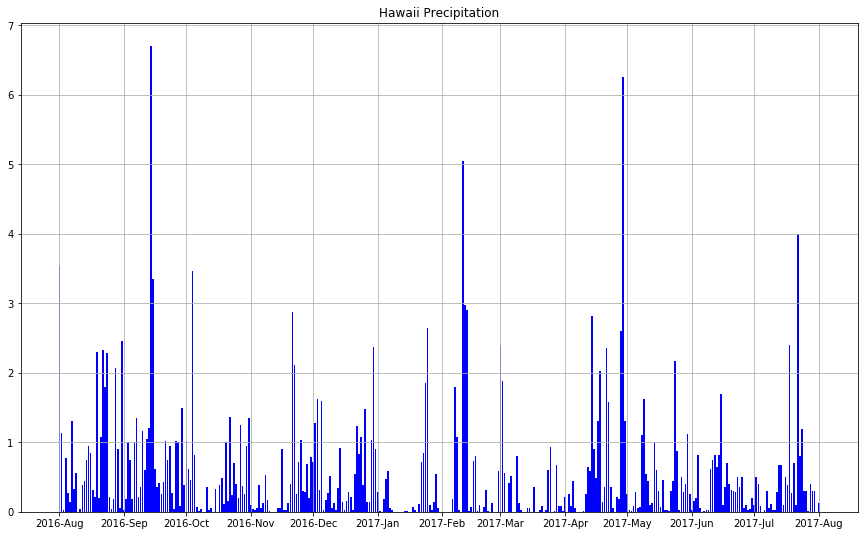

In [31]:
ax0 = plt.bar(s0["Date"], s0["Precipitation"], color = "blue")

fig = plt.gcf()
fig.set_size_inches(15, 9)

ax1 = fig.add_subplot(111)
ax1.bar(s1["Date"], s1["Precipitation"], color = "blue")

ax2 = fig.add_subplot(111)
ax2.bar(s2["Date"], s2["Precipitation"], color = "blue")

ax3 = fig.add_subplot(111)
ax3.bar(s3["Date"], s3["Precipitation"], color = "blue")

ax4 = fig.add_subplot(111)
ax4.bar(s4["Date"], s4["Precipitation"], color = "blue")

ax5 = fig.add_subplot(111)
ax5.bar(s5["Date"], s5["Precipitation"], color = "blue")

ax6 = fig.add_subplot(111)
ax6.bar(s6["Date"], s6["Precipitation"], color = "blue")

ax1.xaxis.set_major_locator(MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.title("Hawaii Precipitation")
plt.grid()
plt.savefig("Precipitation.svg", format = "svg")
plt.show()

In [24]:
df3.describe()

,Precipitation
count,2070.000000
mean,0.187353
std,0.474850
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [25]:
grouped_df3 = df3.groupby("Name")
df4 = grouped_df3.sum()
df4

,Precipitation
Name,
"KANEOHE 838.1, HI US",54.39
"KUALOA RANCH HEADQUARTERS 886.9, HI US",34.26
"MANOA LYON ARBO 785.2, HI US",157.91
"PEARL CITY, HI US",4.77
"WAIHEE 837.5, HI US",79.49
"WAIKIKI 717.2, HI US",17.20
"WAIMANALO EXPERIMENTAL FARM, HI US",39.80


In [26]:
query3 = session.query(func.count(Station.id)).all()
print(f"There are {(np.ravel(query3))} stations in the database")

There are [9] stations in the database


In [27]:
query4 = session.query(Measurement.station,func.count(Measurement.tobs),Station.name).\
group_by(Measurement.station).\
order_by(func.sum(Measurement.tobs).desc()).\
filter(Measurement.station == Station.station).all()
query4

[('USC00519397', 2724, 'WAIKIKI 717.2, HI US'),
 ('USC00519523', 2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00519281', 2772, 'WAIHEE 837.5, HI US'),
 ('USC00513117', 2709, 'KANEOHE 838.1, HI US'),
 ('USC00516128', 2612, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00511918', 1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00517948', 1372, 'PEARL CITY, HI US'),
 ('USC00518838', 511, 'UPPER WAHIAWA 874.3, HI US')]

In [28]:
query5 = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
filter(Measurement.date >= '2016-08-01').\
filter(Measurement.date <= '2017-08-01').\
filter(Measurement.station == 'USC00519397').\
order_by(Measurement.date).all()

In [29]:
observations = [obs[2] for obs in query5]

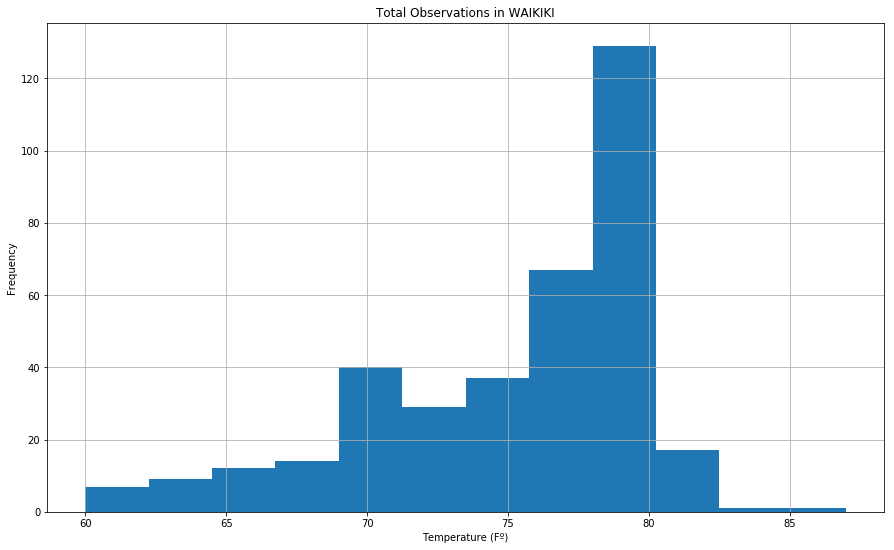

In [32]:
plt.hist(observations, bins = 12)
fi2 = plt.gcf()
fi2.set_size_inches(15, 9)
plt.title("Total Observations in WAIKIKI")
plt.ylabel("Frequency")
plt.xlabel("Temperature (Fº)")
plt.grid()
plt.savefig("Histogram.svg", format = "svg")
plt.show()